In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("AutoInsuranceClaims2024.csv")

In [3]:
print(df.info)

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     QC35222  California                  3622.69       No     Basic   
1     AE98193  Washington                 10610.21       No     Basic   
2     TM23514      Oregon                 13868.02       No  Extended   
3     WB38524  California                  4008.95       No     Basic   
4     QZ42725  Washington                  3119.69       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  PR80703  California                  7757.04       No     Basic   
9130  PJ36160  California                 21968.20       No     Basic   
9131  NS23754  California                  3465.16       No     Basic   
9132  QO56615  California                  4023.01       No  Extended   
9133  IC80537  California                  3484.15      Yes     Basic   

      Coverage Index             Education  Education Index Effective To Date  \
0         

In [4]:
means = df.mean(numeric_only=True)
variances = df.var(numeric_only=True)

In [5]:
print(means)

Customer Lifetime Value          10806.669619
Coverage Index                       0.480622
Education Index                      1.288373
Employment Status Index              0.988395
Income                           50837.478432
Location Index                       0.979089
Marital Status Index                 0.879790
Monthly Premium Auto               125.876396
Months Since Last Claim             20.394022
Months Since Policy Inception       64.912853
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Policy Type Index                    0.298226
Policy Index                         2.214692
Renew Offer Type                     1.970221
Sales Channel Index                  1.622071
Total Claim Amount                 586.019914
Vehicle Class Index                  1.552660
Vehicle Size Index                   0.910444
dtype: float64


In [213]:
print('Max Total Claim Amount', df['Total Claim Amount'].max())
print('Min Total Claim Amount', df['Total Claim Amount'].min())
print('Mean Total Claim Amount', df['Total Claim Amount'].mean())
print('Variance Total Claim Amount', df['Total Claim Amount'].var())
print('Standard Deviation Total Claim Amount', df['Total Claim Amount'].std())

Max Total Claim Amount 3905.87
Min Total Claim Amount 0.13
Mean Total Claim Amount 586.0199135099627
Variance Total Claim Amount 153801.34252025004
Standard Deviation Total Claim Amount 392.1751426598198


In [7]:
print(variances)

Customer Lifetime Value          8.604058e+07
Coverage Index                   4.300964e-01
Education Index                  1.166366e+00
Employment Status Index          8.234720e-01
Income                           1.682056e+09
Location Index                   3.669119e-01
Marital Status Index             4.055633e-01
Monthly Premium Auto             2.159331e+03
Months Since Last Claim          1.858744e+02
Months Since Policy Inception    1.420447e+03
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Policy Type Index                2.920871e-01
Policy Index                     3.176392e+00
Renew Offer Type                 1.015209e+00
Sales Channel Index              9.117914e-01
Total Claim Amount               1.538013e+05
Vehicle Class Index              2.117614e+00
Vehicle Size Index               2.887051e-01
dtype: float64


In [8]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate L2,4,3,Web,0,380.90,Four-Door Car,1,Medsize,1
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal L1,0,1,Branch,1,1098.36,SUV,4,Medsize,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal L3,2,3,Web,0,783.64,SUV,4,Medsize,1
3,WB38524,California,4008.95,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,Personal L3,2,2,Branch,1,479.52,Two-Door Car,0,Small,0
4,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal L3,2,2,Agent,2,622.08,Four-Door Car,1,Medsize,1


In [9]:
df_m = df.drop(columns = ['Customer', 'Customer Lifetime Value', 'Response', 'Effective To Date', 'Sales Channel', 'Sales Channel Index'])
df_m

,State,Coverage,Coverage Index,Education,Education Index,Employment Status,Employment Status Index,Gender,Income,Location,...,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index
0,California,Basic,0,Bachelor,2,Employed,1,F,65163,Urban,...,Corporate Auto,1,Corporate L2,4,3,380.90,Four-Door Car,1,Medsize,1
1,Washington,Basic,0,High School or Below,0,Unemployed,0,M,0,Suburban,...,Personal Auto,0,Personal L1,0,1,1098.36,SUV,4,Medsize,1
2,Oregon,Extended,1,College,1,Employed,1,M,81196,Urban,...,Personal Auto,0,Personal L3,2,3,783.64,SUV,4,Medsize,1
3,California,Basic,0,High School or Below,0,Employed,1,M,62277,Suburban,...,Personal Auto,0,Personal L3,2,2,479.52,Two-Door Car,0,Small,0
4,Washington,Basic,0,Bachelor,2,Unemployed,0,F,0,Suburban,...,Personal Auto,0,Personal L3,2,2,622.08,Four-Door Car,1,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,0,Bachelor,2,Employed,1,F,69302,Rural,...,Personal Auto,0,Personal L3,2,1,231.78,Four-Door Car,1,Medsize,1
9130,California,Basic,0,Bachelor,2,Employed,1,M,112845,Urban,...,Personal Auto,0,Personal L2,1,3,494.15,SUV,4,Small,0
9131,California,Basic,0,High School or Below,0,Employed,1,F,28856,Suburban,...,Corporate Auto,1,Corporate L3,5,3,421.20,Four-Door Car,1,Large,2
9132,California,Extended,1,College,1,Medical Leave,2,F,18272,Suburban,...,Personal Auto,0,Personal L3,2,2,518.40,Four-Door Car,1,Small,0


In [10]:
bins = [0, 30000, 60000, 90000, 120000, np.inf]
labels = [0,1,2,3,4]


df_m['Income Index'] = pd.cut(df_m['Income'], bins=bins, labels=labels, right=False)

state_map = {
    "Arizona": 0,
    "California": 1,
    "Nevada": 2,
    "Oregon": 3,
    "Washington": 4
}

df_m['State Index'] = df_m['State'].map(state_map)
df_m

,State,Coverage,Coverage Index,Education,Education Index,Employment Status,Employment Status Index,Gender,Income,Location,...,Policy,Policy Index,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index,Income Index,State Index
0,California,Basic,0,Bachelor,2,Employed,1,F,65163,Urban,...,Corporate L2,4,3,380.90,Four-Door Car,1,Medsize,1,2,1
1,Washington,Basic,0,High School or Below,0,Unemployed,0,M,0,Suburban,...,Personal L1,0,1,1098.36,SUV,4,Medsize,1,0,4
2,Oregon,Extended,1,College,1,Employed,1,M,81196,Urban,...,Personal L3,2,3,783.64,SUV,4,Medsize,1,2,3
3,California,Basic,0,High School or Below,0,Employed,1,M,62277,Suburban,...,Personal L3,2,2,479.52,Two-Door Car,0,Small,0,2,1
4,Washington,Basic,0,Bachelor,2,Unemployed,0,F,0,Suburban,...,Personal L3,2,2,622.08,Four-Door Car,1,Medsize,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,0,Bachelor,2,Employed,1,F,69302,Rural,...,Personal L3,2,1,231.78,Four-Door Car,1,Medsize,1,2,1
9130,California,Basic,0,Bachelor,2,Employed,1,M,112845,Urban,...,Personal L2,1,3,494.15,SUV,4,Small,0,3,1
9131,California,Basic,0,High School or Below,0,Employed,1,F,28856,Suburban,...,Corporate L3,5,3,421.20,Four-Door Car,1,Large,2,0,1
9132,California,Extended,1,College,1,Medical Leave,2,F,18272,Suburban,...,Personal L3,2,2,518.40,Four-Door Car,1,Small,0,0,1


In [11]:
gender_map = {
    "M": 0,
    "F": 1
}
df_m['Gender Index'] = df_m['Gender'].map(gender_map)
df_m

,State,Coverage,Coverage Index,Education,Education Index,Employment Status,Employment Status Index,Gender,Income,Location,...,Policy Index,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index,Income Index,State Index,Gender Index
0,California,Basic,0,Bachelor,2,Employed,1,F,65163,Urban,...,4,3,380.90,Four-Door Car,1,Medsize,1,2,1,1
1,Washington,Basic,0,High School or Below,0,Unemployed,0,M,0,Suburban,...,0,1,1098.36,SUV,4,Medsize,1,0,4,0
2,Oregon,Extended,1,College,1,Employed,1,M,81196,Urban,...,2,3,783.64,SUV,4,Medsize,1,2,3,0
3,California,Basic,0,High School or Below,0,Employed,1,M,62277,Suburban,...,2,2,479.52,Two-Door Car,0,Small,0,2,1,0
4,Washington,Basic,0,Bachelor,2,Unemployed,0,F,0,Suburban,...,2,2,622.08,Four-Door Car,1,Medsize,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,0,Bachelor,2,Employed,1,F,69302,Rural,...,2,1,231.78,Four-Door Car,1,Medsize,1,2,1,1
9130,California,Basic,0,Bachelor,2,Employed,1,M,112845,Urban,...,1,3,494.15,SUV,4,Small,0,3,1,0
9131,California,Basic,0,High School or Below,0,Employed,1,F,28856,Suburban,...,5,3,421.20,Four-Door Car,1,Large,2,0,1,1
9132,California,Extended,1,College,1,Medical Leave,2,F,18272,Suburban,...,2,2,518.40,Four-Door Car,1,Small,0,0,1,1


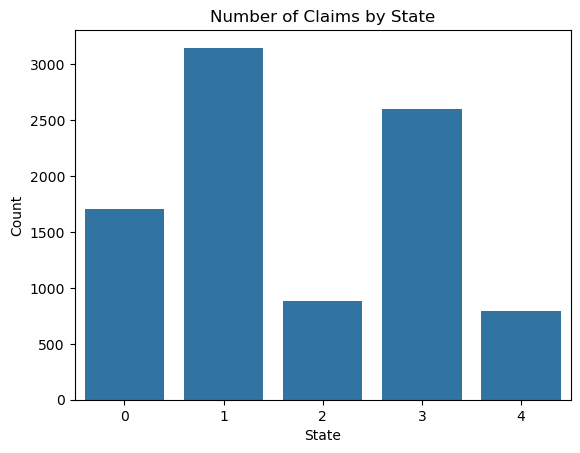

In [12]:
#State Index
sns.countplot(x='State Index', data = df_m)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Number of Claims by State")
plt.show()

## Feature Cardinality Check

In [14]:
df_m.nunique()

State                               5
Coverage                            3
Coverage Index                      3
Education                           5
Education Index                     5
Employment Status                   5
Employment Status Index             5
Gender                              2
Income                           5694
Location                            3
Location Index                      3
Marital Status                      3
Marital Status Index                3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy Type Index                   3
Policy                              9
Policy Index                        9
Renew Offer Type                    4
Total Claim Amount               4989
Vehicle Class                       6
Vehicle Class Index                 6
Vehicle Size

These numbers are good, we just wanted to check that for the categorical features, that the cardinality (amount of unique variables) is low. 


# Checking prediction power by feature/target means

In [17]:
df_m.groupby('State Index')['Total Claim Amount'].mean()

State Index
0    574.238039
1    591.056029
2    592.313277
3    584.567001
4    589.063835
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='State Index', ylabel='Total Claim Amount'>

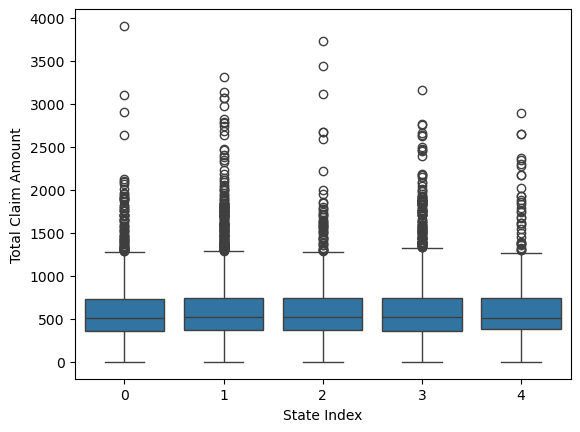

In [18]:
sns.boxplot(x = 'State Index', y = 'Total Claim Amount', data = df_m)

In [19]:
df_m.groupby('Coverage Index')['Total Claim Amount'].mean()

Coverage Index
0    511.699054
1    648.781539
2    879.376917
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Coverage Index', ylabel='Total Claim Amount'>

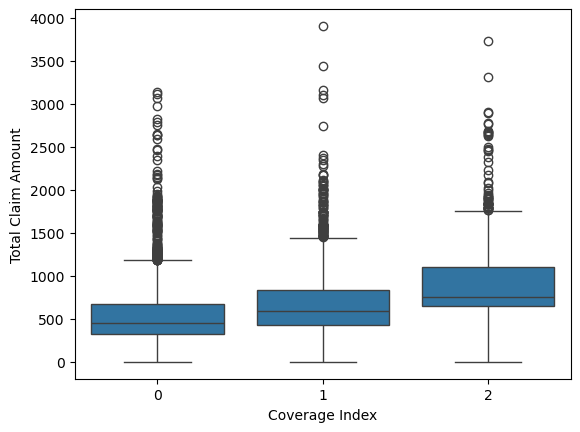

In [20]:
sns.boxplot(x = 'Coverage Index', y = 'Total Claim Amount', data = df_m)

In [21]:
df_m.groupby('Education Index')['Total Claim Amount'].mean()

Education Index
0    657.706133
1    572.147564
2    577.791910
3    472.820297
4    456.551988
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Education Index', ylabel='Total Claim Amount'>

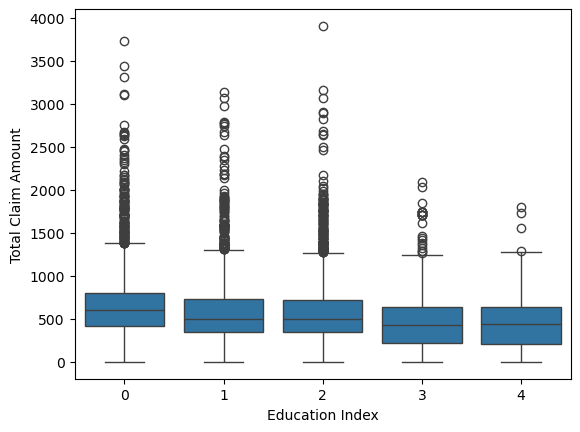

In [22]:
sns.boxplot(x = 'Education Index', y = 'Total Claim Amount', data = df_m)

In [23]:
df_m.groupby('Employment Status Index')['Total Claim Amount'].mean()

Employment Status Index
0    809.432762
1    483.672239
2    637.110856
3    661.366773
4    640.860346
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Employment Status Index', ylabel='Total Claim Amount'>

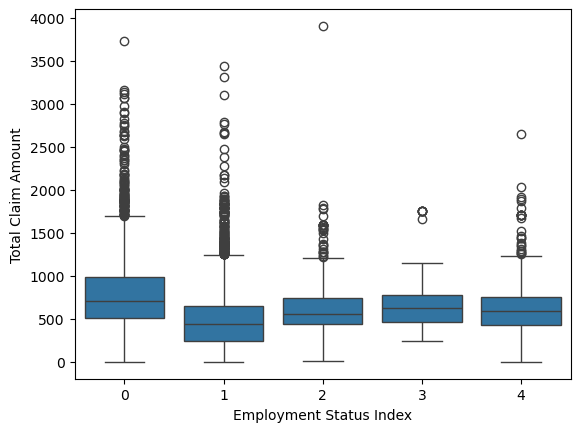

In [24]:
sns.boxplot(x = 'Employment Status Index', y = 'Total Claim Amount', data = df_m)

In [25]:
df_m.groupby('Gender Index')['Total Claim Amount'].mean()

Gender Index
0    615.849086
1    557.356243
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Gender Index', ylabel='Total Claim Amount'>

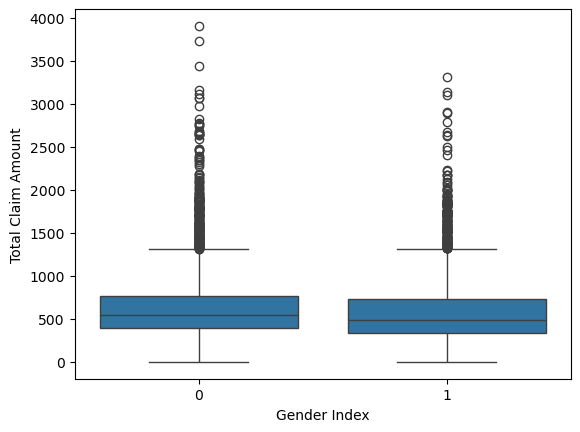

In [26]:
sns.boxplot(x = 'Gender Index', y = 'Total Claim Amount', data = df_m)

In [27]:
df_m.groupby('Income Index')['Total Claim Amount'].mean()

/var/folders/r8/44796x693xb2yp_76_b4vcnr0000gn/T/ipykernel_4762/1787530608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_m.groupby('Income Index')['Total Claim Amount'].mean()


Income Index
0    769.378750
1    544.485158
2    498.441005
3    423.841582
4    404.257689
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Income Index', ylabel='Total Claim Amount'>

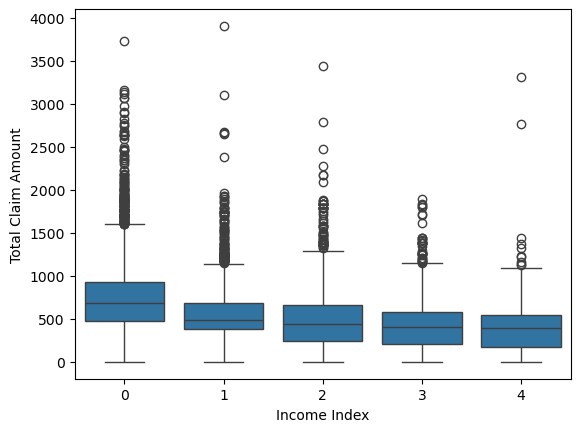

In [28]:
sns.boxplot(x = 'Income Index', y = 'Total Claim Amount', data = df_m)

In [29]:
df_m.groupby('Location Index')['Total Claim Amount'].mean()

Location Index
0    148.371895
1    758.915856
2    444.922750
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Location Index', ylabel='Total Claim Amount'>

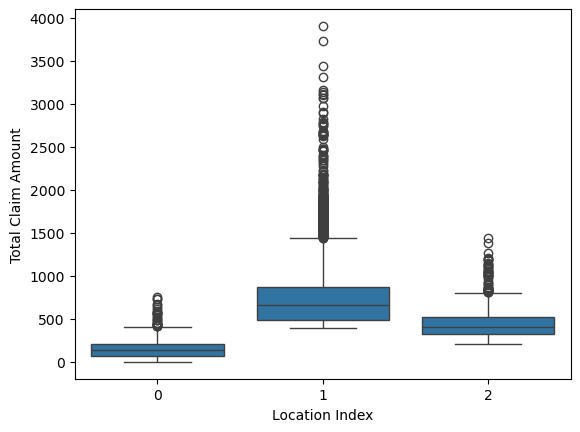

In [30]:
sns.boxplot(x = 'Location Index', y = 'Total Claim Amount', data = df_m)

In [31]:
df_m.groupby('Marital Status Index')['Total Claim Amount'].mean()

Marital Status Index
0    752.499976
1    519.098048
2    545.001454
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Marital Status Index', ylabel='Total Claim Amount'>

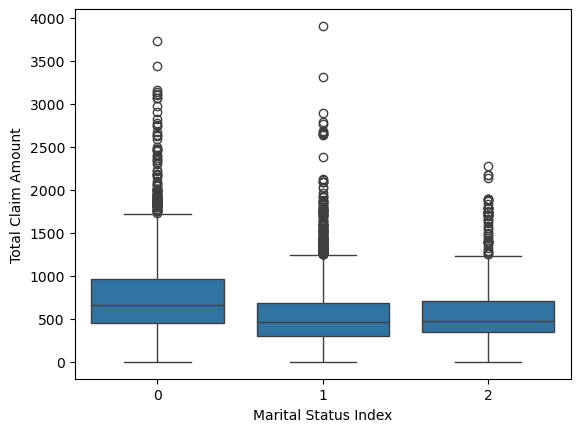

In [32]:
sns.boxplot(x = 'Marital Status Index', y = 'Total Claim Amount', data = df_m)

In [33]:
df_m.groupby('Policy Type Index')['Total Claim Amount'].mean()

Policy Type Index
0    587.018136
1    580.921499
2    594.638280
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Policy Type Index', ylabel='Total Claim Amount'>

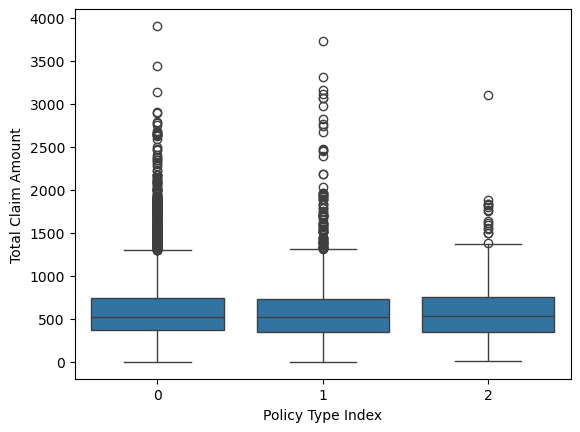

In [34]:
sns.boxplot(x = 'Policy Type Index', y = 'Total Claim Amount', data = df_m)

In [35]:
df_m.groupby('Policy Index')['Total Claim Amount'].mean()

Policy Index
0    595.434661
1    585.572309
2    584.867393
3    591.013510
4    592.897546
5    570.321124
6    625.369697
7    584.014390
8    592.706149
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Policy Index', ylabel='Total Claim Amount'>

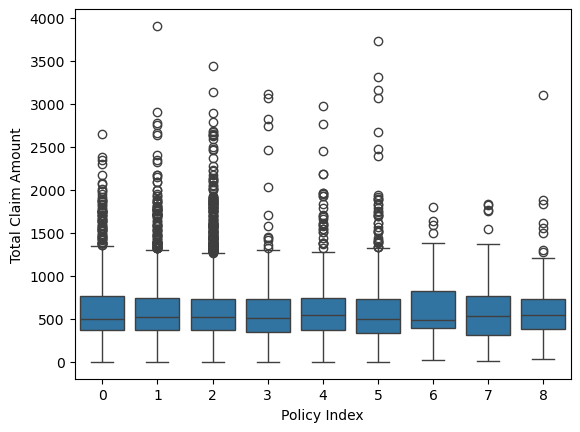

In [36]:
sns.boxplot(x = 'Policy Index', y = 'Total Claim Amount', data = df_m)

In [37]:
df_m.groupby('Vehicle Class Index')['Total Claim Amount'].mean()

Vehicle Class Index
0     473.232911
1     474.876576
2     753.499897
3    1525.890184
4     768.923541
5    1474.908859
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Vehicle Class Index', ylabel='Total Claim Amount'>

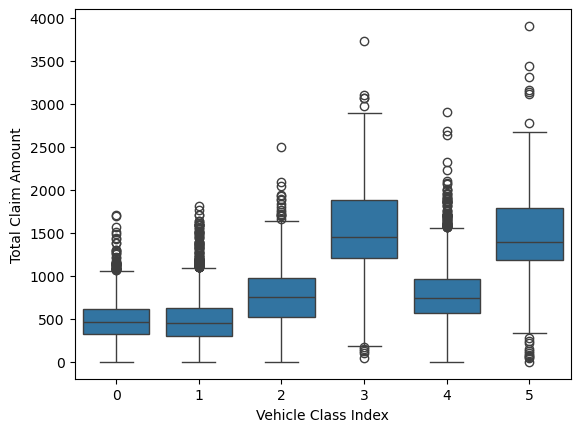

In [38]:
sns.boxplot(x = 'Vehicle Class Index', y = 'Total Claim Amount', data = df_m)

In [39]:
df_m.groupby('Vehicle Size Index')['Total Claim Amount'].mean()

Vehicle Size Index
0    660.724598
1    567.101779
2    575.185909
Name: Total Claim Amount, dtype: float64

<Axes: xlabel='Vehicle Size Index', ylabel='Total Claim Amount'>

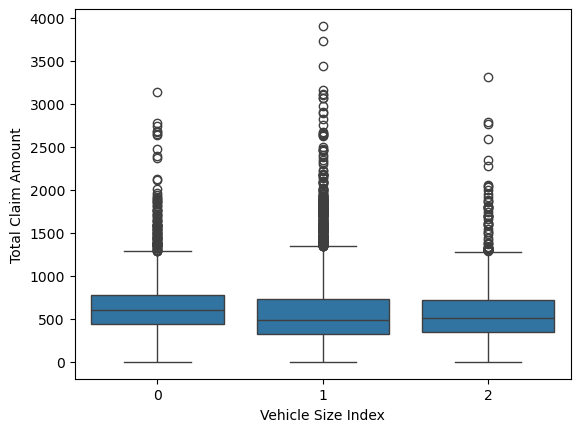

In [40]:
sns.boxplot(x = 'Vehicle Size Index', y = 'Total Claim Amount', data = df_m)

Seeing how much the Total Claim Amount mean of the different groups of each features vary gives us valuable insight as to whether or not the feature will have strong prediction power.

Features that show almost no variance between feature class means are State Index, Policy Type Index, Gender Index, and Policy index. We can consider excluding those features to help reduce overfitting and increase the simplicity of our model. Although a few of the means seem to not vary much, many of the box plots (e.g. Education Index and Marital Status Index) show a lot of difference on the tails which can still be important since we are predicting severity.  

# Checking for dominant groups

In [44]:
df_m['Coverage Index'].value_counts(normalize = True)

Coverage Index
0    0.609591
1    0.300197
2    0.090212
Name: proportion, dtype: float64

In [45]:
df_m['State Index'].value_counts(normalize = True)

State Index
1    0.344865
3    0.284760
0    0.186446
2    0.096562
4    0.087366
Name: proportion, dtype: float64

In [46]:
df_m['Education Index'].value_counts(normalize = True)

Education Index
2    0.300854
1    0.293519
0    0.287059
3    0.081125
4    0.037443
Name: proportion, dtype: float64

In [47]:
df_m['Employment Status Index'].value_counts(normalize = True)

Employment Status Index
1    0.623823
0    0.253668
2    0.047296
4    0.044340
3    0.030874
Name: proportion, dtype: float64

In [48]:
df_m['Gender Index'].value_counts(normalize = True)

Gender Index
1    0.509963
0    0.490037
Name: proportion, dtype: float64

In [49]:
df_m['Income Index'].value_counts(normalize = True)

Income Index
0    0.343223
1    0.257062
2    0.184038
3    0.156448
4    0.059229
Name: proportion, dtype: float64

In [50]:
df_m['Location Index'].value_counts(normalize = True)

Location Index
1    0.632691
0    0.194110
2    0.173199
Name: proportion, dtype: float64

In [51]:
df_m['Marital Status Index'].value_counts(normalize = True)

Marital Status Index
1    0.580031
0    0.270090
2    0.149880
Name: proportion, dtype: float64

In [52]:
df_m['Policy Type Index'].value_counts(normalize = True)

Policy Type Index
0    0.743157
1    0.215459
2    0.041384
Name: proportion, dtype: float64

In [53]:
df_m['Policy Index'].value_counts(normalize = True)

Policy Index
2    0.375082
1    0.232319
0    0.135757
5    0.111014
4    0.065141
3    0.039304
7    0.017955
8    0.016203
6    0.007226
Name: proportion, dtype: float64

In [54]:
df_m['Vehicle Class Index'].value_counts(normalize = True)

Vehicle Class Index
1    0.505912
0    0.206481
4    0.196628
2    0.052989
5    0.020145
3    0.017845
Name: proportion, dtype: float64

In [55]:
df_m['Vehicle Size Index'].value_counts(normalize = True)

Vehicle Size Index
1    0.703306
0    0.193125
2    0.103569
Name: proportion, dtype: float64

Here we are checking for any classes that might have more than 90% of the values which would make it ineffective in predicting anything. However, our data does not have any of those examples. It does have a few classes that have very low counts, we can consider collapsing these classes if we want to further simplify later on. 

# Dropping State Index, Policy Type Index, Gender Index, Policy Index

Along with the non-index columns that relate to these.

In [59]:
df_work = df_m.drop(columns = ['State Index', 'State', 'Policy Type Index', 'Policy Type', 'Gender Index', 'Gender', 'Policy Index', 'Policy'])
df_work = df_work.drop(columns = ['Coverage', 'Education', 'Employment Status', 'Income', 'Location', 'Marital Status', 'Vehicle Class', 'Vehicle Size'])
df_work

,Coverage Index,Education Index,Employment Status Index,Location Index,Marital Status Index,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class Index,Vehicle Size Index,Income Index
0,0,2,1,2,1,93,4,107,3,1,3,380.90,1,1,2
1,0,0,0,1,0,153,26,14,0,7,1,1098.36,4,1,0
2,1,1,1,2,0,178,11,38,0,3,3,783.64,4,1,2
3,0,0,1,1,1,100,36,38,0,1,2,479.52,0,0,2
4,0,2,0,1,0,86,16,32,0,1,2,622.08,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,0,1,96,23,119,0,9,1,231.78,1,1,2
9130,0,2,1,2,0,139,36,88,0,2,3,494.15,4,0,3
9131,0,0,1,1,1,88,19,89,0,1,3,421.20,1,2,0
9132,1,1,2,1,1,108,9,72,1,1,2,518.40,1,0,0


# Split the data

In [61]:
X = df_work.drop(columns = ['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Total Claim Amount'])
Y = df_work['Total Claim Amount']

In [62]:
categorical_cols = [
    'Coverage Index', 'Education Index', 'Employment Status Index',
    'Location Index', 'Marital Status Index', 'Vehicle Class Index', 'Vehicle Size Index'
]
for col in categorical_cols:
    X[col] = X[col].astype('category')

In [63]:
X

,Coverage Index,Education Index,Employment Status Index,Location Index,Marital Status Index,Vehicle Class Index,Vehicle Size Index,Income Index
0,0,2,1,2,1,1,1,2
1,0,0,0,1,0,4,1,0
2,1,1,1,2,0,4,1,2
3,0,0,1,1,1,0,0,2
4,0,2,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...
9129,0,2,1,0,1,1,1,2
9130,0,2,1,2,0,4,0,3
9131,0,0,1,1,1,1,2,0
9132,1,1,2,1,1,1,0,0


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [65]:
dtrain = xgb.DMatrix(X_train, label = Y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, label = Y_test, enable_categorical = True)

In [66]:
parameters = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'seed': 7
}


In [67]:
model = xgb.train(parameters, dtrain, num_boost_round = 250)

In [68]:
Y_predictions = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(Y_test, Y_predictions))
r2 = r2_score(Y_test, Y_predictions)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 159.72493316758195
R2: 0.8299141811221238


# Adding Months Since Last Claim into the model (Non-categorical data)

In [70]:
X = df_work.drop(columns = ['Monthly Premium Auto', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Total Claim Amount'])
Y = df_work['Total Claim Amount']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [72]:
dtrain = xgb.DMatrix(X_train, label = Y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, label = Y_test, enable_categorical = True)

In [73]:
parameters = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'seed': 7
}


In [74]:
model = xgb.train(parameters, dtrain, num_boost_round = 250)

In [75]:
Y_predictions = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(Y_test, Y_predictions))
r2 = r2_score(Y_test, Y_predictions)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 164.10683141392093
R2: 0.8204538919888753


Adding months since last claim resulted in a slight increase in RMSE, so we will not use it.

# Try using non-binned income feature

In [78]:
df_work = df_m.drop(columns = ['State Index', 'State', 'Policy Type Index', 'Policy Type', 'Gender Index', 'Gender', 'Policy Index', 'Policy'])
df_work = df_work.drop(columns = ['Coverage', 'Education', 'Employment Status', 'Location', 'Marital Status', 'Vehicle Class', 'Vehicle Size'])
df_work

,Coverage Index,Education Index,Employment Status Index,Income,Location Index,Marital Status Index,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class Index,Vehicle Size Index,Income Index
0,0,2,1,65163,2,1,93,4,107,3,1,3,380.90,1,1,2
1,0,0,0,0,1,0,153,26,14,0,7,1,1098.36,4,1,0
2,1,1,1,81196,2,0,178,11,38,0,3,3,783.64,4,1,2
3,0,0,1,62277,1,1,100,36,38,0,1,2,479.52,0,0,2
4,0,2,0,0,1,0,86,16,32,0,1,2,622.08,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,69302,0,1,96,23,119,0,9,1,231.78,1,1,2
9130,0,2,1,112845,2,0,139,36,88,0,2,3,494.15,4,0,3
9131,0,0,1,28856,1,1,88,19,89,0,1,3,421.20,1,2,0
9132,1,1,2,18272,1,1,108,9,72,1,1,2,518.40,1,0,0


In [79]:
X = df_work.drop(columns = ['Education Index', 'Monthly Premium Auto', 'Income Index', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Total Claim Amount'])
Y = df_work['Total Claim Amount']
X

,Coverage Index,Employment Status Index,Income,Location Index,Marital Status Index,Months Since Last Claim,Vehicle Class Index,Vehicle Size Index
0,0,1,65163,2,1,4,1,1
1,0,0,0,1,0,26,4,1
2,1,1,81196,2,0,11,4,1
3,0,1,62277,1,1,36,0,0
4,0,0,0,1,0,16,1,1
...,...,...,...,...,...,...,...,...
9129,0,1,69302,0,1,23,1,1
9130,0,1,112845,2,0,36,4,0
9131,0,1,28856,1,1,19,1,2
9132,1,2,18272,1,1,9,1,0


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [81]:
dtrain = xgb.DMatrix(X_train, label = Y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, label = Y_test, enable_categorical = True)

In [82]:
parameters = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'max_depth': 4,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'seed': 7
}


In [83]:
model = xgb.train(parameters, dtrain, num_boost_round = 250)

In [84]:
Y_predictions = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(Y_test, Y_predictions))
r2 = r2_score(Y_test, Y_predictions)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 156.70852472524203
R2: 0.8362776689807659


The model parameter 'tree method': 'hist' bins continuous features on its own. We found that allowing it make its own bins yields a slihtyl better RMSE. Thereofre, we will stick with this process from here.

Some trial and error with max_depth showed 4 as the best depth for this iteration of the model.

To decrease overfitting, we reasoned that Education Index is correlated with income, so we removed Education Index from our model. 

# Apply Cross Validation

In [89]:
cross_val_results = xgb.cv(params = parameters, dtrain = dtrain, num_boost_round = 250, 
       nfold = 5, metrics = 'rmse')

Text(0, 0.5, 'RMSE')

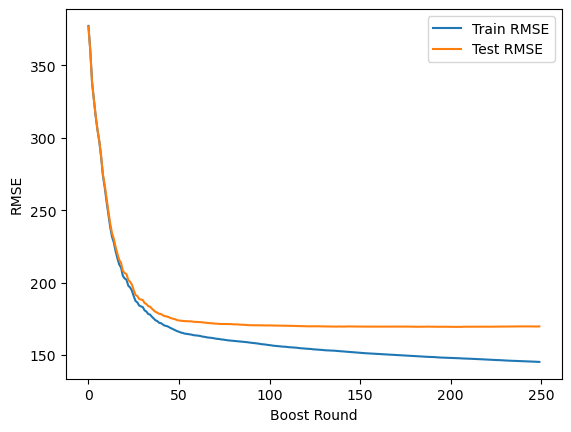

In [90]:
plt.plot(cross_val_results['train-rmse-mean'], label = 'Train RMSE')
plt.plot(cross_val_results['test-rmse-mean'], label = 'Test RMSE')
plt.legend()
plt.xlabel('Boost Round')
plt.ylabel('RMSE')

This plot of the train and test rmse shows that around the 50th boost round, the test rmse stops decreasing while the train continues to decrease. We want to avoid this trend because it leads to overfitting. Based on what we see here, we will train a model with 50 boost rounds to maintain good generity. 

In [92]:
X = df_work.drop(columns = ['Education Index', 'Monthly Premium Auto', 'Income Index', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Total Claim Amount'])
Y = df_work['Total Claim Amount']
X

,Coverage Index,Employment Status Index,Income,Location Index,Marital Status Index,Months Since Last Claim,Vehicle Class Index,Vehicle Size Index
0,0,1,65163,2,1,4,1,1
1,0,0,0,1,0,26,4,1
2,1,1,81196,2,0,11,4,1
3,0,1,62277,1,1,36,0,0
4,0,0,0,1,0,16,1,1
...,...,...,...,...,...,...,...,...
9129,0,1,69302,0,1,23,1,1
9130,0,1,112845,2,0,36,4,0
9131,0,1,28856,1,1,19,1,2
9132,1,2,18272,1,1,9,1,0


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [94]:
dtrain = xgb.DMatrix(X_train, label = Y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, label = Y_test, enable_categorical = True)

In [95]:
parameters = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'max_depth': 4,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'seed': 7
}


In [96]:
model = xgb.train(parameters, dtrain, num_boost_round = 50)

In [97]:
Y_predictions = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(Y_test, Y_predictions))
r2 = r2_score(Y_test, Y_predictions)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 161.66092195604875
R2: 0.8257660519513981


This result shows that we can achieve a very similar RMSE while doing 200 less boosting rounds. This is a net positive because we are able to generalize better which will helps our model perform better on unseen data. 

In [99]:
importance = model.get_score(importance_type = 'gain')
importance

{'Coverage Index': 4425478.0,
 'Employment Status Index': 1255416.375,
 'Income': 1596196.375,
 'Location Index': 17475324.0,
 'Marital Status Index': 3437950.5,
 'Months Since Last Claim': 194054.34375,
 'Vehicle Class Index': 12075987.0,
 'Vehicle Size Index': 335750.6875}

Gain is the average improvement in loss across all splits where the specific feature is used. So a high gain shows that the feature was able to contribute a large reduction in the loss function across all the times where it was the criteria the data was split on. The reason these numbers are so big is because the loss function is squared error and its cumulative over the entire model, so its a very large number. 

In [101]:
df['Vehicle Class'].value_counts()

Vehicle Class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

We could use the proportions in the data of this category to make an assumption about claim frequency. 

In [103]:
df.shape[0]

9134

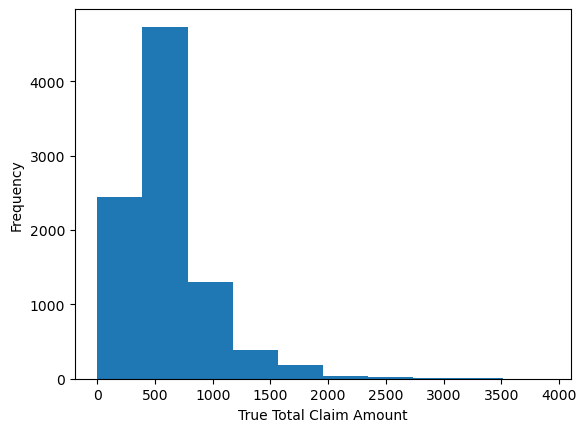

In [211]:
plt.hist(df['Total Claim Amount'])
plt.xlabel("True Total Claim Amount")
plt.ylabel("Frequency")
plt.show()

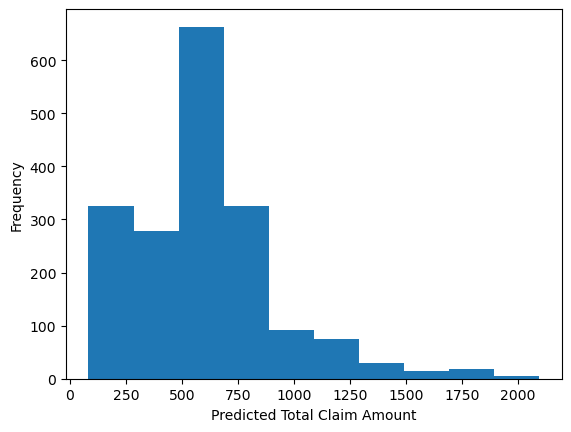

In [105]:
plt.hist(Y_predictions)
plt.xlabel("Predicted Total Claim Amount")
plt.ylabel("Frequency")
plt.show()

In [106]:
percentiles = np.percentile(Y_predictions, [1, 25, 50, 75, 90, 95, 99])
percentiles

array([ 103.98663818,  348.92251587,  541.81512451,  773.83859253,
        966.65595703, 1177.73405762, 1767.03005371])

In [107]:
df_predictions = X_test.copy()
df_predictions['Actual Total Claim Amount'] = Y_test.values
df_predictions['Predicted Total Claim Amount'] = Y_predictions
df_predictions

,Coverage Index,Employment Status Index,Income,Location Index,Marital Status Index,Months Since Last Claim,Vehicle Class Index,Vehicle Size Index,Actual Total Claim Amount,Predicted Total Claim Amount
2558,0,0,0,1,0,26,1,2,440.64,664.603394
7882,0,3,20214,1,2,3,4,1,1117.80,864.866455
608,0,1,125834,0,1,47,0,2,100.61,99.488953
1242,0,0,0,1,1,16,4,1,771.12,882.568420
652,0,0,0,1,0,39,1,1,602.64,666.520020
...,...,...,...,...,...,...,...,...,...,...
7838,0,1,106134,2,2,9,0,1,304.53,331.034851
6483,0,1,85856,0,1,14,4,1,248.37,202.122055
2893,0,1,71117,0,1,28,1,1,159.30,127.656570
2531,0,0,0,1,0,26,1,2,440.64,664.603394


In [108]:
q1, q2, q3 = np.quantile(Y_predictions, [0.25, 0.5, 0.75])

In [109]:
risk_bins = [-np.inf, q1, q2, q3, np.inf]
labels = ['Low', 'Medium', 'High', 'Extreme']

In [110]:
df_predictions['Predicted Customer Risk Level'] = pd.cut(
    df_predictions['Predicted Total Claim Amount'],
    bins = risk_bins, 
    labels = labels,
    include_lowest = True
)

In [111]:
df_predictions

,Coverage Index,Employment Status Index,Income,Location Index,Marital Status Index,Months Since Last Claim,Vehicle Class Index,Vehicle Size Index,Actual Total Claim Amount,Predicted Total Claim Amount,Predicted Customer Risk Level
2558,0,0,0,1,0,26,1,2,440.64,664.603394,High
7882,0,3,20214,1,2,3,4,1,1117.80,864.866455,Extreme
608,0,1,125834,0,1,47,0,2,100.61,99.488953,Low
1242,0,0,0,1,1,16,4,1,771.12,882.568420,Extreme
652,0,0,0,1,0,39,1,1,602.64,666.520020,High
...,...,...,...,...,...,...,...,...,...,...,...
7838,0,1,106134,2,2,9,0,1,304.53,331.034851,Low
6483,0,1,85856,0,1,14,4,1,248.37,202.122055,Low
2893,0,1,71117,0,1,28,1,1,159.30,127.656570,Low
2531,0,0,0,1,0,26,1,2,440.64,664.603394,High
